# Fashion Mnist - FF - Keras

Dans ce notebook nous allons travailler sur Fashion MNIST un dataset plus conséquent que MNIST et construisant un reseau MLP avec Tensorflow - Keras

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |




Le dataset est disponible dans [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.15.0


## Softmax

La function softmax permet de transformer les valeurs de sortie du réseau en valeurs dans l'intervale [0,1] et donc interpretable comme des probabilités.

Dans un contexte de classification avec N classe, le reseau produit un array de dimension N. La classe la plus probable est celle avec la plus grande valeur.

Voici un exemple sur un array arbitraire

In [3]:
# soit un array de taille 4
inputs = np.array([[1.1, 3.3, 4.4, 2.2]])
inputs = tf.convert_to_tensor(inputs)
print(f'input: {inputs.numpy()}')

# appliquer la fonction softmax
outputs = tf.keras.activations.softmax(inputs)
print(f'output: {outputs.numpy()}')

# on verifie que la somme des probabilité est bien 1
sum = tf.reduce_sum(outputs)
print(f'somme des proba: {sum}')

# La categorie la plus probable est
prediction = np.argmax(outputs)
print(f'index categorie la plus probable: {prediction}')
print(f'soit la valeur : {inputs.numpy()[0][prediction]}')


input: [[1.1 3.3 4.4 2.2]]
output: [[0.02491168 0.22482822 0.67542129 0.07483881]]
somme des proba: 1.0
index categorie la plus probable: 2
soit la valeur : 4.4


In [4]:
# charger le dataset
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 1


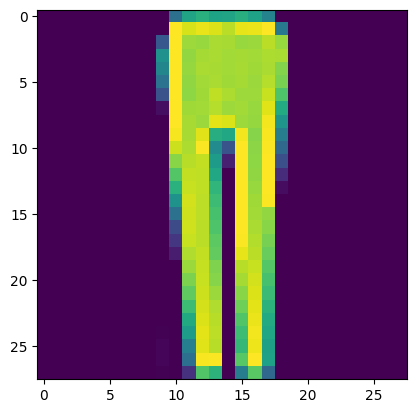

In [7]:
idx = 1802
print(f'LABEL: {train_labels[idx]}')

plt.imshow(train_images[idx])

In [9]:
# Normaliser
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Construire le model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## questions
- pourquoi la premiere couche est Flatten ?
- pourquoi la derniere couche est de dimension 10 ?


In [15]:
# build le modele

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


## questions
- que fait la fonction de cout : sparse_categorical_crossentropy
- on a choisi la metrique accuracy, peut on en prendre d'autres ?


In [ ]:
# entrainer le modele
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4377 - accuracy: 0.8454
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3668 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3310 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3076 - accuracy: 0.8882
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2913 - accuracy: 0.8916


In [ ]:
# evaluer le modele sur la partie test
model.evaluate(test_images, test_labels)

In [14]:
model.evaluate(train_images, train_labels)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4170 - accuracy: 0.8553


[0.4169580936431885, 0.8552666902542114]

In [46]:
# recap du modele

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# questions
- sur quoi peut-on jouer pour ameliorer la perf du modele
- ce modele est il en overfit ?
-

In [19]:
# voici le code commplet du modele

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

train_score = model.evaluate(train_images, train_labels)
test_score = model.evaluate(test_images, test_labels)

print(f"train : {train_score}, test : {test_score} ")

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4979 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3735 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3378 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8850
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 4.0668 - accuracy: 0.1000
train : [0.30117109417915344, 0.8892333507537842], test : [4.066755771636963, 0.10000000149011612] 


## Exploration

- que se passe t il quand on augmente la taille de la couche caché a 512 noeuds au niveau de la performance et du temps d'entrainement ? a 1024 ?
- quels sont les optimizers disponibles ?
- comment specifier le learning rate de l'optimizer ?
- que se passe t il (perf, overfit) quand on rajoute une couche cachée ?
